# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from statistics import  mean
#from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
#weather_api_key = "xxx"
#geoapify_key = "XXX"

# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 622


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key +"&units=" + units + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        #city_max_temp = city_weather['coord']['lat']
        city_humidity = city_weather['main']['humidity']
        #city_humidity = city_weather['coord']['lat']
        city_clouds = city_weather['clouds']['all']
        #city_clouds = city_weather['coord']['loall
        city_wind = city_weather['wind']['speed']
        #city_wind = city_weather['coord']['lon']
        #city_country = city_weather['sys']['country']
        city_country = city_weather['coord']['lon']
        #city_date = city_weather['dt']
        city_date = city_weather['coord']['lon']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | san patricio
Processing Record 2 of Set 1 | newnham
Processing Record 3 of Set 1 | tiksi
Processing Record 4 of Set 1 | walvis bay
Processing Record 5 of Set 1 | st. john's
Processing Record 6 of Set 1 | thompson
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | prince rupert
Processing Record 10 of Set 1 | thunder bay
Processing Record 11 of Set 1 | itaocara
Processing Record 12 of Set 1 | olinda
Processing Record 13 of Set 1 | talnakh
Processing Record 14 of Set 1 | espargos
City not found. Skipping...
Processing Record 15 of Set 1 | la'ie
Processing Record 16 of Set 1 | beylikova
Processing Record 17 of Set 1 | wailua homesteads
Processing Record 18 of Set 1 | kapuskasing
Processing Record 19 of Set 1 | puerto natales
Processing Record 20 of Set 1 | tolanaro
Processing Record 21 of Set 1 | aitape
Processing Record 22 of 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          590
Lat           590
Lng           590
Max Temp      590
Humidity      590
Cloudiness    590
Wind Speed    590
Country       590
Date          590
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,san patricio,28.0170,-97.5169,11.92,49,95,7.53,-97.5169,-97.5169
1,newnham,-41.3833,147.1333,5.53,75,72,0.00,147.1333,147.1333
2,tiksi,71.6872,128.8694,-16.71,98,100,4.37,128.8694,128.8694
3,walvis bay,-22.9575,14.5053,17.27,73,18,3.55,14.5053,14.5053
4,st. john's,47.5649,-52.7093,3.97,89,97,1.79,-52.7093,-52.7093


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,san patricio,28.0170,-97.5169,11.92,49,95,7.53,-97.5169,-97.5169
1,newnham,-41.3833,147.1333,5.53,75,72,0.00,147.1333,147.1333
2,tiksi,71.6872,128.8694,-16.71,98,100,4.37,128.8694,128.8694
3,walvis bay,-22.9575,14.5053,17.27,73,18,3.55,14.5053,14.5053
4,st. john's,47.5649,-52.7093,3.97,89,97,1.79,-52.7093,-52.7093


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

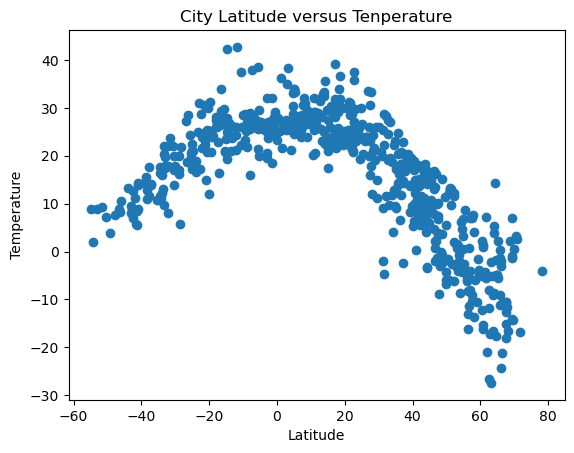

In [8]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values)



# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title("City Latitude versus Tenperature")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

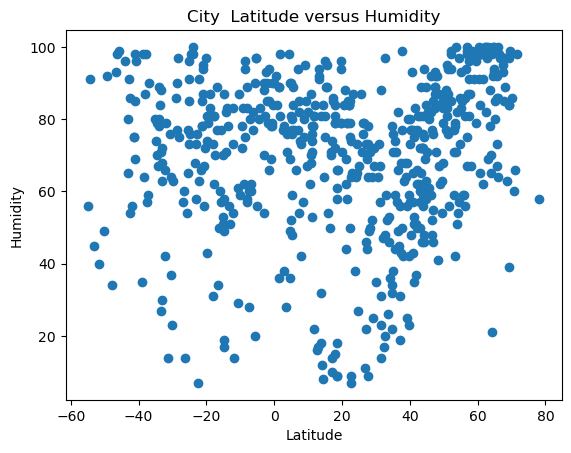

In [9]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values,y_values)


# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("City  Latitude versus Humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

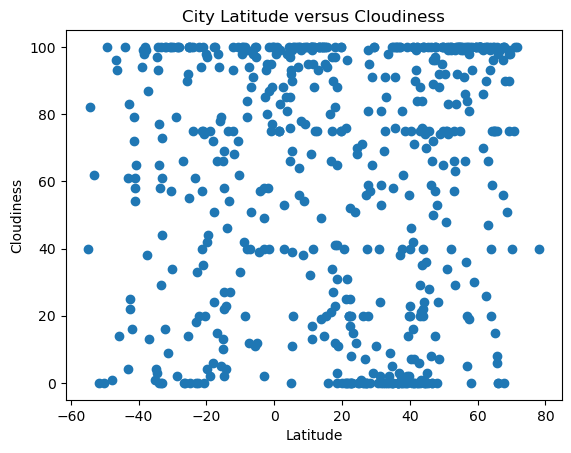

In [10]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("City Latitude versus Cloudiness")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

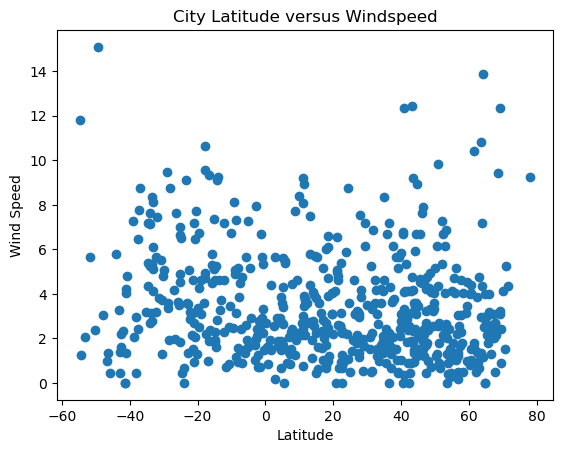

In [11]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("City Latitude versus Windspeed")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linear_regression_plt(x_values, y_values, xlabel, ylabel, hemisphere):
    from statistics import mean
    # Perform a linear regression on temperature vs. latitude
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

    # Get regression values
    regress_values = x_values * slope + intercept
    print(regress_values)
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    print(line_eq)
    # Create Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")

    # Label plot and annotate the line equation
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title( xlabel + " versus " + ylabel + " " + hemisphere + " Linear Regression")
    #plt.annotate(line_eq,(20,5),fontsize=15,color="red")
    #plt.annotate(line_eq,(20,round(intercept,2)),fontsize=15,color="red")
    xposit = round(mean(x_values),0)
    yposit = round(mean(y_values),0)
    plt.annotate(line_eq, (xposit, yposit),ha="center", va="center", fontsize=20,color="red", weight = 'bold')

    # Print r value
    print(f"The r-value is: {rvalue**2}")
    filename = "output_data/" + xlabel + ylabel + hemisphere + ".png" 
    plt.savefig(filename)
    return(plt.show())
    


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]
#northern_hemi.df = city_data_df.query('Latitude' >= 0)

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,san patricio,28.0170,-97.5169,11.92,49,95,7.53,-97.5169,-97.5169
2,tiksi,71.6872,128.8694,-16.71,98,100,4.37,128.8694,128.8694
4,st. john's,47.5649,-52.7093,3.97,89,97,1.79,-52.7093,-52.7093
5,thompson,55.7435,-97.8558,-4.57,59,99,4.70,-97.8558,-97.8558
8,prince rupert,54.3161,-130.3201,6.25,54,100,2.40,-130.3201,-130.3201


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,newnham,-41.3833,147.1333,5.53,75,72,0.00,147.1333,147.1333
3,walvis bay,-22.9575,14.5053,17.27,73,18,3.55,14.5053,14.5053
6,punta arenas,-53.1500,-70.9167,8.95,45,62,2.04,-70.9167,-70.9167
7,port-aux-francais,-49.3500,70.2167,3.96,92,100,15.09,70.2167,70.2167
10,itaocara,-21.6692,-42.0761,30.53,66,94,2.14,-42.0761,-42.0761


###  Temperature vs. Latitude Linear Regression Plot

City_ID
0      18.597317
2      -9.473842
4       6.031948
5       0.774752
8       1.692283
         ...    
585     3.095385
586    16.424400
587     0.406685
588    26.118258
589    25.364255
Name: Lat, Length: 412, dtype: float64
y = -0.64x +36.61
The r-value is: 0.7616680499937231


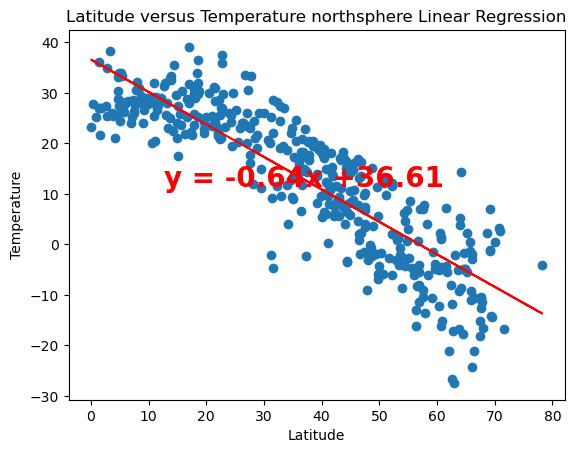

In [15]:
# Linear regression on Northern Hemisphere

linear_regression_plt(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], "Latitude", "Temperature", "northsphere")

City_ID
1      12.695540
3      20.668853
6       7.603789
7       9.248146
10     21.226333
         ...    
563    24.203614
568    29.802606
572    13.876881
578    15.889054
583    28.218831
Name: Lat, Length: 178, dtype: float64
y = 0.43x +30.6
The r-value is: 0.6098199832133777


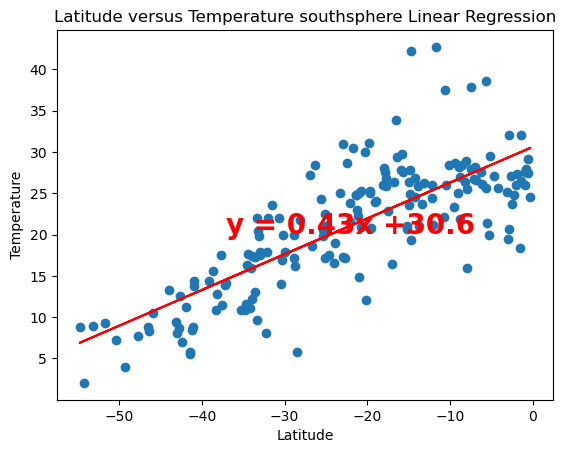

In [16]:
# Linear regression on Southern Hemisphere
linear_regression_plt(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], "Latitude", "Temperature", "southsphere")

**Discussion about the linear relationship:** 
There is a very strong correlation between Latitude and temparature. Cities tha lie proximate to the equator have the highest temperatture while the further away either Northward or Southwards, the lower the tempaeratre.

### Humidity vs. Latitude Linear Regression Plot

City_ID
0      67.039843
2      79.995812
4      72.839267
5      75.265674
8      74.842196
         ...    
585    74.194608
586    68.042732
587    75.435551
588    63.568627
589    63.916630
Name: Lat, Length: 412, dtype: float64
y = 0.3x +58.73
The r-value is: 0.0674000429043807


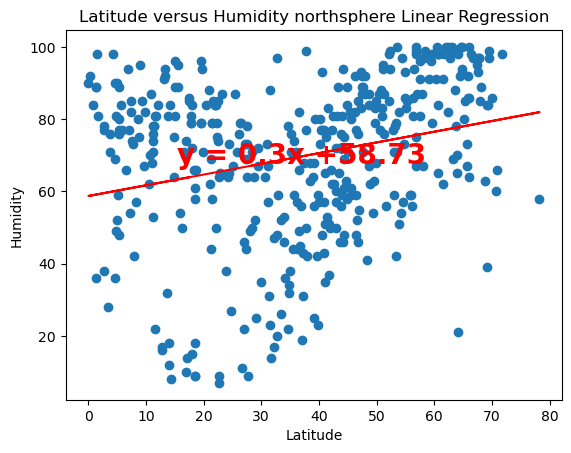

In [17]:
# Northern Hemisphere

linear_regression_plt(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], "Latitude", "Humidity", "northsphere")

City_ID
1      70.159761
3      70.758394
6      69.777474
7      69.900932
10     70.800249
         ...    
563    71.023782
568    71.444153
572    70.248455
578    70.399529
583    71.325243
Name: Lat, Length: 178, dtype: float64
y = 0.03x +71.5
The r-value is: 0.0004733629402904687


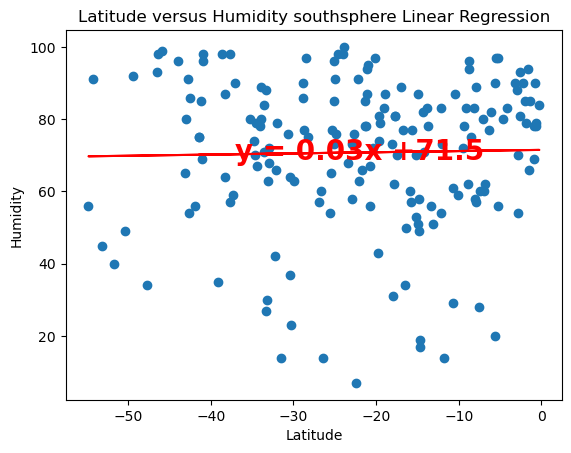

In [18]:
# Southern Hemisphere


linear_regression_plt(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], "Latitude", "Humidity", "southsphere")

**Discussion about the linear relationship:**
In the southern hemisphere, the closer to the equator the higher the humidity for the randomly selected cities. The reverse holds in the Northern Hemisphere wehere the further away from the equaotr, the more humid the weather is. This is a bit of an anomaly as it is a well established fact that cities on our around the equator enjoy the highest humidity.

### Cloudiness vs. Latitude Linear Regression Plot

City_ID
0      58.802832
2      65.610339
4      61.850047
5      63.124963
8      62.902454
         ...    
585    62.562189
586    59.329784
587    63.214223
588    56.978937
589    57.161790
Name: Lat, Length: 412, dtype: float64
y = 0.16x +54.44
The r-value is: 0.006147116341133678


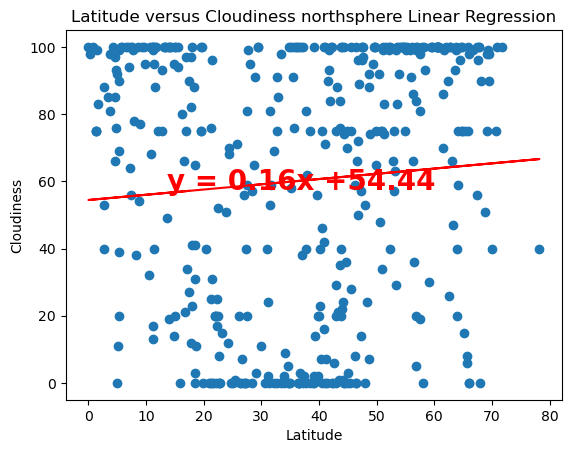

In [19]:
# Northern Hemisphere

linear_regression_plt(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], "Latitude", "Cloudiness", "northsphere")

City_ID
1      53.448604
3      59.459204
6      49.610240
7      50.849822
10     59.879455
         ...    
563    62.123848
568    66.344590
572    54.339146
578    55.856002
583    65.150677
Name: Lat, Length: 178, dtype: float64
y = 0.33x +66.95
The r-value is: 0.015826002798988836


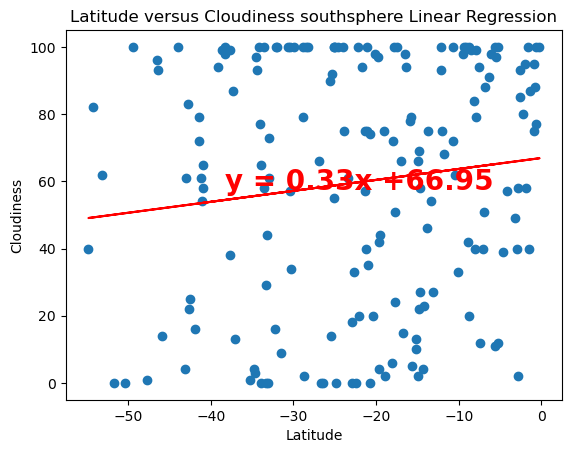

In [20]:
# Southern Hemisphere

linear_regression_plt(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], "Latitude", "Cloudiness","southsphere")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

There is a postive and strong correlation between cloudiness and latitdue. Cities in the extreme southern hemisphere are the least cloudy and that trend continues all the way to the topmost part of the Nothern Hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

City_ID
0      3.064273
2      3.247094
4      3.146109
5      3.180348
8      3.174372
         ...   
585    3.165234
586    3.078425
587    3.182745
588    3.015291
589    3.020201
Name: Lat, Length: 412, dtype: float64
y = 0.0x +2.95
The r-value is: 0.0012959945587036712


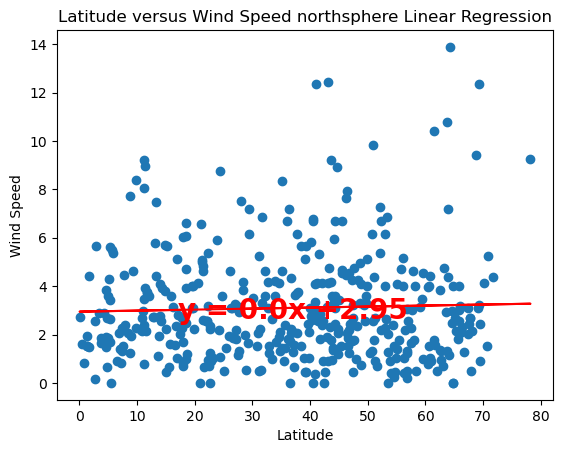

In [21]:
# Northern Hemisphere

linear_regression_plt(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], "Latitude", "Wind Speed", "northsphere")

City_ID
1      4.459026
3      4.054992
6      4.717042
7      4.633717
10     4.026743
         ...   
563    3.875874
568    3.592155
572    4.399164
578    4.297200
583    3.672410
Name: Lat, Length: 178, dtype: float64
y = -0.02x +3.55
The r-value is: 0.013218421224516129


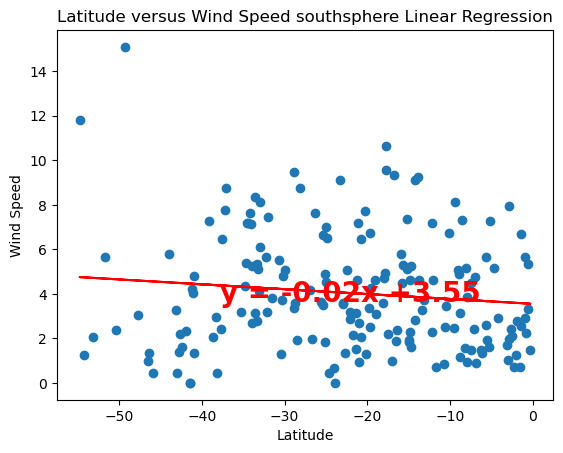

In [22]:
# Southern Hemisphere
linear_regression_plt(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], "Latitude", "Wind Speed", "southsphere")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

The windespeed has a fairly decent correlation to the latitude. The further away both northward and southwards from the equator, the higher the relative windspeed. There are fewer cities, the further north and south in the respective hemisphres.